In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt

In [2]:
# Questions of focus:
# Q43_1 - 43_17: 
# How would you characterize the atmosphere of the CS program at U-M?
# Rank 1-4 (Not accurate, Slightly accurate, Moderately accurate, Very accurate)

# Positive sentiment
# 1, 2, 3, 6, 9, 10, 11, 12, 13, 17
# Friendly, welcoming, collaborative, dedicated, supportive, 
# motivated, enthusiastic, awesome, inspiring, upbeat

# Negative sentiment
# 4, 5, 16
# Competitive, difficult, condescending

# Neutral sentiment
# 7, 8, 14, 15
# Rigorous, serious, entrepreneurial, research-oriented


In [3]:
# Read in data

S1 = pd.read_csv('../CleanedData/S1_all.csv')
S2 = pd.read_csv('../CleanedData/S2_all.csv')
pd.set_option('max_columns', None, 'max_rows', None)

In [4]:
# Subset of positive/negative/neutral sentiments

S1_43_pos = S1[['Group','Q43_1','Q43_2','Q43_3',
            'Q43_6','Q43_9','Q43_10','Q43_11','Q43_12',
            'Q43_13','Q43_17']]
S2_43_pos = S2[['Group','Q43_1','Q43_2','Q43_3',
            'Q43_6','Q43_9','Q43_10','Q43_11','Q43_12',
            'Q43_13','Q43_17']]

S1_43_neg = S1[['Group','Q43_4','Q43_5','Q43_16']]
S2_43_neg = S2[['Group','Q43_4','Q43_5','Q43_16']]

S1_43_neutral = S1[['Group','Q43_7','Q43_8','Q43_14','Q43_15']]
S2_43_neutral = S2[['Group','Q43_7','Q43_8','Q43_14','Q43_15']]

In [5]:
# Plot student perceptions of CS atmosphere at U-M 
# one word at a time, showing frequency of each ranking (1-4)

                        #  df       df        str    str
def plotCSAtm_individual(survey1, survey2, question, word):
    
    title = question + ': (Scale 1-4) How would you characterize the atmosphere of CS at U-M?\n' + word

    testS1 = survey1[survey1.Group == 'Test']
    testS2 = survey2[survey2.Group == 'Test']
    conS1 = survey1[survey1.Group == 'Control']
    conS2 = survey2[survey2.Group == 'Control']
    
    # Check length (can't divide by 0)
    total_testS1 = len(testS1) if (len(testS1) > 0) else 1
    total_conS1 = len(conS1) if (len(conS1) > 0) else 1
    total_testS2 = len(testS2) if (len(testS2) > 0) else 1
    total_conS2 = len(conS2) if (len(conS2) > 0) else 1

    # Create dictionaries of value counts
    tS1Dict = testS1[question].value_counts().to_dict()
    cS1Dict = conS1[question].value_counts().to_dict()
    tS2Dict = testS2[question].value_counts().to_dict()
    cS2Dict = conS2[question].value_counts().to_dict()

    # Check dictionaries have proper keys
    dicts = [tS1Dict, cS1Dict, tS2Dict, cS2Dict]
    key_list = [1.0, 2.0, 3.0, 4.0]
    for i in range(len(dicts)):
        for j in range(len(key_list)):
            if key_list[j] not in dicts[i]:
                dicts[i][key_list[j]] = 0

    # Get percentages of test and control
    S1Data = [[tS1Dict[1.0] / total_testS1 * 100,
               tS1Dict[2.0] / total_testS1 * 100,
               tS1Dict[3.0] / total_testS1 * 100,
               tS1Dict[4.0] / total_testS1 * 100],
              [cS1Dict[1.0] / total_conS1 * 100,
               cS1Dict[2.0] / total_conS1 * 100,
               cS1Dict[3.0] / total_conS1 * 100,
               cS1Dict[4.0] / total_conS1 * 100]]
    S2Data = [[tS2Dict[1.0] / total_testS2 * 100,
               tS2Dict[2.0] / total_testS2 * 100,
               tS2Dict[3.0] / total_testS2 * 100,
               tS2Dict[4.0] / total_testS2 * 100],
               [cS2Dict[1.0] / total_conS2 * 100,
                cS2Dict[2.0] / total_conS2 * 100,
                cS2Dict[3.0] / total_conS2 * 100,
                cS2Dict[4.0] / total_conS2 * 100]]

    # Plot
    
    # Get max value to set y limit
    max_val = max([max(tS1Dict.values()) / total_testS1 * 100, max(cS1Dict.values()) / total_conS1 * 100, 
                  max(tS2Dict.values()) / total_testS2 * 100, max(cS2Dict.values()) / total_conS2 * 100])
    
    X = np.arange(4)
    fig, ax = plt.subplots(1,2, constrained_layout=True)
    fig.suptitle(title, x=1, y=1.15)

    # survey 1
    ax[0] = fig.add_axes([0,0,1,1])
    ax[0].set_ylim([0,max_val+2])
    ax[0].bar(X + 0.0, S1Data[0], color = 'r', width = 0.2, label = 'Test')
    ax[0].bar(X + 0.2, S1Data[1], color = 'b', width = 0.2, label = 'Control')
    ax[0].set_title('Survey 1')
    ax[0].set_xticks(X + 0.2)
    ax[0].set_xticklabels(['1', '2', '3', '4'])
    ax[0].set_ylabel('% Students')
    ax[0].legend(loc='best')

    # survey 2
    ax[1] = fig.add_axes([1.1,0,1,1])
    ax[1].set_ylim([0,max_val+2])
    ax[1].bar(X + 0.0, S2Data[0], color = 'r', width = 0.2, label = 'Test')
    ax[1].bar(X + 0.2, S2Data[1], color = 'b', width = 0.2, label = 'Control')
    ax[1].set_title('Survey 2')
    ax[1].set_xticks(X + 0.2)
    ax[1].set_xticklabels(['1', '2', '3', '4'])
    ax[1].set_ylabel('% Students')
    ax[1].legend(loc='best')


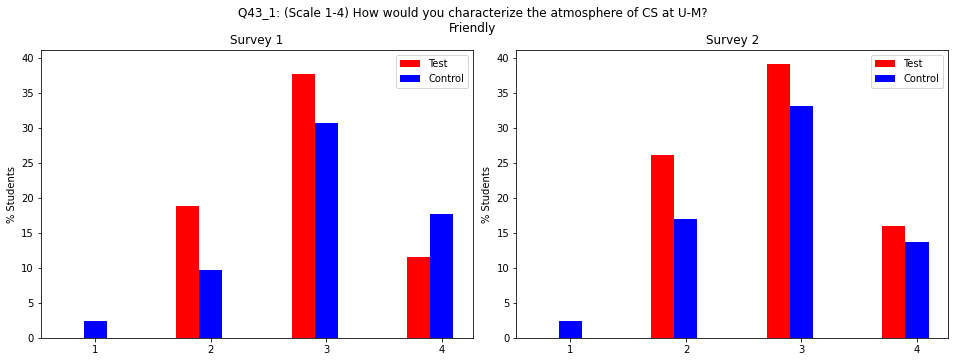

In [6]:
plotCSAtm_individual(S1_43_pos, S2_43_pos, 'Q43_1', 'Friendly')

In [7]:
# Plot student perceptions of CS atmosphere at U-M 
# by sentiment, showing average rankings
                        # df       df       str
def plotCSAtm_averages(survey1, survey2, sentiment):
    
    title = 'Q43: (Scale 1-4) How would you characterize the atmosphere of CS at U-M?\n' + sentiment + ' sentiment'

    testS1 = survey1[survey1.Group == 'Test']
    testS2 = survey2[survey2.Group == 'Test']
    conS1 = survey1[survey1.Group == 'Control']
    conS2 = survey2[survey2.Group == 'Control']

    # get question lists based on sentiment
    if sentiment == 'Positive':
        question_list = ['Q43_1','Q43_2','Q43_3','Q43_6','Q43_9',
                     'Q43_10','Q43_11','Q43_12','Q43_13','Q43_17']
        word_list = ['friendly', 'welcoming', 'collaborative', 'dedicated',
                    'supportive', 'motivated', 'enthusiastic', 'awesome',
                    'inspiring', 'upbeat']
        
    elif sentiment == 'Negative':
        question_list = ['Q43_4', 'Q43_5', 'Q43_16']
        word_list = ['competitive', 'difficult', 'condescending']
        
    elif sentiment == 'Neutral':
        question_list = ['Q43_7', 'Q43_8', 'Q43_14', 'Q43_15']
        word_list = ['rigorous', 'serious', 'entrepreneurial',
                    'research-oriented']
        
    else:
        print('Error: enter Positive, Negative, or Neutral for sentiment')
        return
    
    
    # get averages
    testS1Averages = []
    for i in range(len(question_list)):
        avg = np.mean(testS1[question_list[i]])
        testS1Averages.append(avg)
        
    testS2Averages = []
    for i in range(len(question_list)):
        avg = np.mean(testS2[question_list[i]])
        testS2Averages.append(avg)
        
    conS1Averages = []
    for i in range(len(question_list)):
        avg = np.mean(conS1[question_list[i]])
        conS1Averages.append(avg)
        
    conS2Averages = []
    for i in range(len(question_list)):
        avg = np.mean(conS2[question_list[i]])
        conS2Averages.append(avg)

    # Data for altair plots
    print('Test S1 Averages: ', testS1Averages, '\nMean: ', np.mean(testS1Averages))
    print('Control S1 Averages: ', conS1Averages, '\nMean: ', np.mean(conS1Averages))
    print('Test S2 Averages: ', testS2Averages, '\nMean: ', np.mean(testS2Averages))
    print('Control S2 Averages: ', conS2Averages, '\nMean: ', np.mean(conS2Averages))
        
    # Plot
    
    X = np.arange(len(question_list))
    fig, ax = plt.subplots(1,2, constrained_layout=True)
    fig.suptitle(title, x=1, y=1.15)

    # survey 1
    ax[0] = fig.add_axes([0,0,1,1])
    ax[0].set_ylim([1,4])
    ax[0].bar(X + 0.0, testS1Averages, color = 'r', width = 0.2, label = 'Test')
    ax[0].bar(X + 0.2, conS1Averages, color = 'b', width = 0.2, label = 'Control')
    ax[0].set_title('Survey 1')
    ax[0].set_xticks(X + 0.2)
    ax[0].set_xticklabels(word_list, rotation = 45)
    ax[0].set_ylabel('Average of Rankings')
    ax[0].legend(loc='best')

    # survey 2
    ax[1] = fig.add_axes([1.1,0,1,1])
    ax[1].set_ylim([1,4])
    ax[1].bar(X + 0.0, testS2Averages, color = 'r', width = 0.2, label = 'Test')
    ax[1].bar(X + 0.2, conS2Averages, color = 'b', width = 0.2, label = 'Control')
    ax[1].set_title('Survey 2')
    ax[1].set_xticks(X + 0.2)
    ax[1].set_xticklabels(word_list, rotation = 45)
    ax[1].set_ylabel('Average of Rankings')
    ax[1].legend(loc='best')

Test S1 Averages:  [2.893617021276596, 2.7708333333333335, 2.9019607843137254, 3.411764705882353, 2.74, 3.372549019607843, 2.977777777777778, 2.723404255319149, 2.6595744680851063, 2.4893617021276597] 
Mean:  2.8940843067723545
Control S1 Averages:  [3.0533333333333332, 2.9466666666666668, 2.9178082191780823, 3.5555555555555554, 2.986666666666667, 3.4266666666666667, 3.1066666666666665, 3.1333333333333333, 3.026666666666667, 2.661764705882353] 
Mean:  3.0815128480615988
Test S2 Averages:  [2.875, 2.7636363636363637, 3.142857142857143, 3.526315789473684, 2.912280701754386, 3.508771929824561, 2.982142857142857, 2.9272727272727272, 3.0, 2.480769230769231] 
Mean:  3.0119046742730955
Control S2 Averages:  [2.8780487804878048, 2.7560975609756095, 2.85, 3.2142857142857144, 2.7261904761904763, 3.0120481927710845, 2.731707317073171, 2.825, 2.654320987654321, 2.430379746835443] 
Mean:  2.8078078776273623


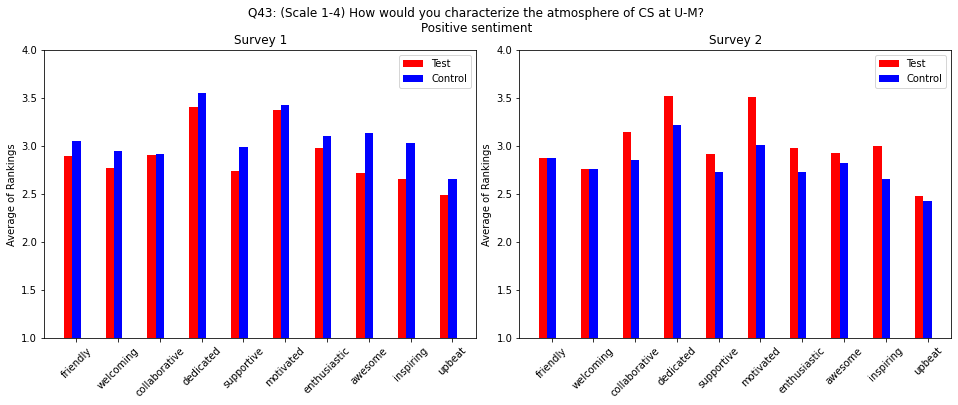

In [8]:
plotCSAtm_averages(S1_43_pos, S2_43_pos, 'Positive')

In [18]:
# Altair plot

S1_43_pos_avgs = pd.DataFrame({'Group': ['Test','Test','Test','Test','Test','Test','Test','Test', 'Test', 'Test',
                                 'Control','Control','Control','Control','Control','Control','Control','Control', 'Control', 'Control'],
                        'Sentiment': ['friendly','welcoming','collaborative','dedicated','supportive','motivated','enthusiastic','awesome', 'inspiring', 'upbeat',
                                   'friendly','welcoming','collaborative','dedicated','supportive','motivated','enthusiastic','awesome', 'inspiring', 'upbeat'],
                       'Average of Rankings': [2.893617021276596, 2.7708333333333335, 2.9019607843137254, 3.411764705882353, 2.74, 3.372549019607843, 2.977777777777778, 2.723404255319149, 2.6595744680851063, 2.4893617021276597,
                                              3.0533333333333332, 2.9466666666666668, 2.9178082191780823, 3.5555555555555554, 2.986666666666667, 3.4266666666666667, 3.1066666666666665, 3.1333333333333333, 3.026666666666667, 2.661764705882353]})

S2_43_pos_avgs = pd.DataFrame({'Group': ['Test','Test','Test','Test','Test','Test','Test','Test', 'Test', 'Test',
                                 'Control','Control','Control','Control','Control','Control','Control','Control', 'Control', 'Control'],
                        'Sentiment': ['friendly','welcoming','collaborative','dedicated','supportive','motivated','enthusiastic','awesome', 'inspiring', 'upbeat',
                                   'friendly','welcoming','collaborative','dedicated','supportive','motivated','enthusiastic','awesome', 'inspiring', 'upbeat'],
                       'Average of Rankings': [2.875, 2.7636363636363637, 3.142857142857143, 3.526315789473684, 2.912280701754386, 3.508771929824561, 2.982142857142857, 2.9272727272727272, 3.0, 2.480769230769231,
                                              2.8780487804878048, 2.7560975609756095, 2.85, 3.2142857142857144, 2.7261904761904763, 3.0120481927710845, 2.731707317073171, 2.825, 2.654320987654321, 2.430379746835443]})


selection = alt.selection_multi(fields=['Group'], bind='legend')

chart1 = alt.Chart(S1_43_pos_avgs).mark_bar().encode(
    column='Sentiment',
    x='Group',
    y='Average of Rankings',
    color=alt.Color('Group', scale=alt.Scale(domain=['Test','Control'], range=['#1A540B','#93D882'])),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.05))
).add_selection(selection).properties(title='Survey 1')


chart2 = alt.Chart(S2_43_pos_avgs).mark_bar().encode(
    column='Sentiment',
    x='Group',
    y='Average of Rankings',
    color=alt.Color('Group', scale=alt.Scale(domain=['Test','Control'], range=['#1A540B','#93D882'])),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.05))
).add_selection(selection).properties(title='Survey 2+')

chart1 | chart2

alt.HConcatChart(...)

Test S1 Averages:  [3.4489795918367347, 3.450980392156863, 2.5] 
Mean:  3.1333199946645323
Control S1 Averages:  [2.986666666666667, 3.066666666666667, 2.014925373134328] 
Mean:  2.689419568822554
Test S2 Averages:  [3.4035087719298245, 3.719298245614035, 2.3518518518518516] 
Mean:  3.1582196231319037
Control S2 Averages:  [3.1904761904761907, 3.3095238095238093, 2.1375] 
Mean:  2.8791666666666664


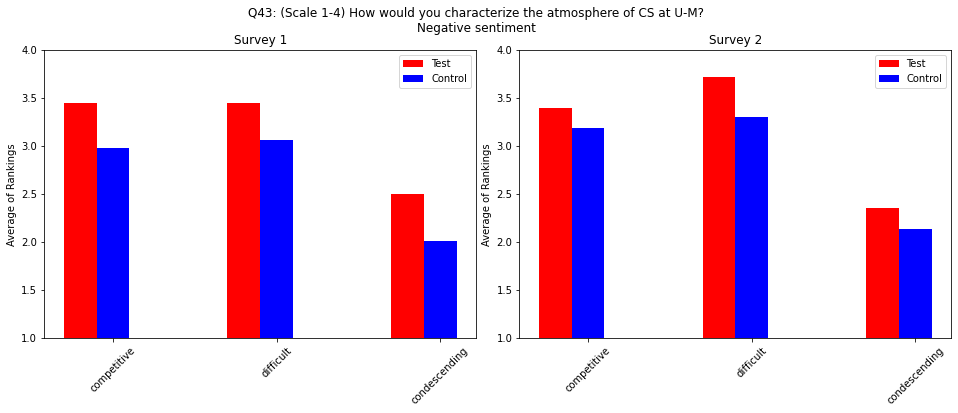

In [10]:
plotCSAtm_averages(S1_43_neg, S2_43_neg, 'Negative')

In [17]:
# Altair plot

S1_43_neg_avgs = pd.DataFrame({'Group': ['Test','Test','Test','Control','Control','Control'],
                        'Sentiment': ['competitive','difficult','condescending',
                                      'competitive','difficult','condescending'],
                       'Average of Rankings': [3.4489795918367347, 3.450980392156863, 2.5,
                                              2.986666666666667, 3.066666666666667, 2.014925373134328]})

S2_43_neg_avgs = pd.DataFrame({'Group': ['Test','Test','Test','Control','Control','Control'],
                        'Sentiment': ['competitive','difficult','condescending',
                                      'competitive','difficult','condescending'],
                       'Average of Rankings': [3.4035087719298245, 3.719298245614035, 2.3518518518518516,
                                              3.1904761904761907, 3.3095238095238093, 2.1375]})

y_min = 0
y_max = 4

selection = alt.selection_multi(fields=['Group'], bind='legend')

chart1 = alt.Chart(S1_43_neg_avgs).mark_bar().encode(
    column='Sentiment',
    x='Group',
    y=alt.Y('Average of Rankings', scale=alt.Scale(domain=[y_min, y_max])),
    color=alt.Color('Group', scale=alt.Scale(domain=['Test','Control'], range=['#7A0000','#FEA897'])),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.05))
).add_selection(selection).properties(title='Survey 1')


chart2 = alt.Chart(S2_43_neg_avgs).mark_bar().encode(
    column='Sentiment',
    x='Group',
    y=alt.Y('Average of Rankings', scale=alt.Scale(domain=[y_min, y_max])),
    color=alt.Color('Group', scale=alt.Scale(domain=['Test','Control'], range=['#7A0000','#FEA897'])),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.05))
).add_selection(selection).properties(title='Survey 2+')

chart1 | chart2

alt.HConcatChart(...)

Test S1 Averages:  [3.588235294117647, 3.3877551020408165, 3.111111111111111, 2.6956521739130435] 
Mean:  3.1956884202956544
Control S1 Averages:  [3.4, 3.2816901408450705, 3.013888888888889, 2.462686567164179] 
Mean:  3.0395663992245345
Test S2 Averages:  [3.824561403508772, 3.508771929824561, 3.1785714285714284, 2.6545454545454548] 
Mean:  3.291612554112554
Control S2 Averages:  [3.4761904761904763, 3.180722891566265, 2.7468354430379747, 2.2972972972972974] 
Mean:  2.925261527023004


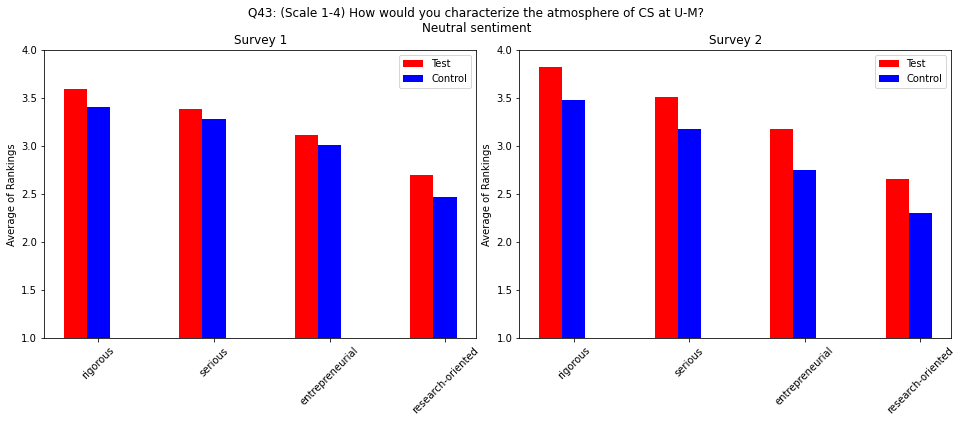

In [12]:
plotCSAtm_averages(S1_43_neutral, S2_43_neutral, 'Neutral')

In [15]:
# Altair plot

S1_43_neutral_avgs = pd.DataFrame({'Group': ['Test','Test','Test','Test','Control','Control','Control','Control'],
                        'Sentiment': ['rigorous','serious','entrepreneurial','research-oriented',
                                      'rigorous','serious','entrepreneurial','research-oriented'],
                       'Average of Rankings': [3.588235294117647, 3.3877551020408165, 3.111111111111111, 2.6956521739130435,
                                              3.4, 3.2816901408450705, 3.013888888888889, 2.462686567164179]})

S2_43_neutral_avgs = pd.DataFrame({'Group': ['Test','Test','Test','Test','Control','Control','Control','Control'],
                        'Sentiment': ['rigorous','serious','entrepreneurial','research-oriented',
                                      'rigorous','serious','entrepreneurial','research-oriented'],
                       'Average of Rankings': [3.824561403508772, 3.508771929824561, 3.1785714285714284, 2.6545454545454548,
                                              3.4761904761904763, 3.180722891566265, 2.7468354430379747, 2.2972972972972974]})

y_min = 0
y_max = 4

selection = alt.selection_multi(fields=['Group'], bind='legend')

chart1 = alt.Chart(S1_43_neutral_avgs).mark_bar().encode(
    column= alt.Column('Sentiment',
        title="",
        header=alt.Header(labelAngle=-30,labelAnchor='end',labelAlign='center')),
    x='Group',
    y=alt.Y('Average of Rankings', scale=alt.Scale(domain=[y_min, y_max])),
    color=alt.Color('Group', scale=alt.Scale(domain=['Test','Control'], range=['#000000','#B3B3B3'])),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.05))
).add_selection(selection).properties(title='Survey 1')


chart2 = alt.Chart(S2_43_neutral_avgs).mark_bar().encode(
    column= alt.Column('Sentiment',
        title="",
        header=alt.Header(labelAngle=-30,labelAnchor='end',labelAlign='center')),
    x='Group',
    y=alt.Y('Average of Rankings', scale=alt.Scale(domain=[y_min, y_max])),
    color=alt.Color('Group', scale=alt.Scale(domain=['Test','Control'], range=['#000000','#B3B3B3'])),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.05))
).add_selection(selection).properties(title='Survey 2+')

chart1 | chart2

alt.HConcatChart(...)